In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [6]:
V = 42
E = 87
read_country = open("europe.txt")
read_edges = open("dist.txt")
country = []  
edges = []  
edges_name = []

matrix = [[0] * V for i in range(V)]  
for i in range(V):
    pars_first = read_country.readline().split('.')
    if i != V - 1:
        num, name = pars_first[0], pars_first[1][:-1]
    else:
        num, name = pars_first[0], pars_first[1]
    country.append(name)

In [7]:
for i in range(E):
    pars_sec = read_edges.readline().split()

    a, b, c = int(pars_sec[0]), int(pars_sec[1]), int(float(pars_sec[2]) // 1)
    matrix[a][b] = 1
    matrix[b][a] = 1
    edges.append([country[a], country[b], c])
    edges_name.append([a, b, c])

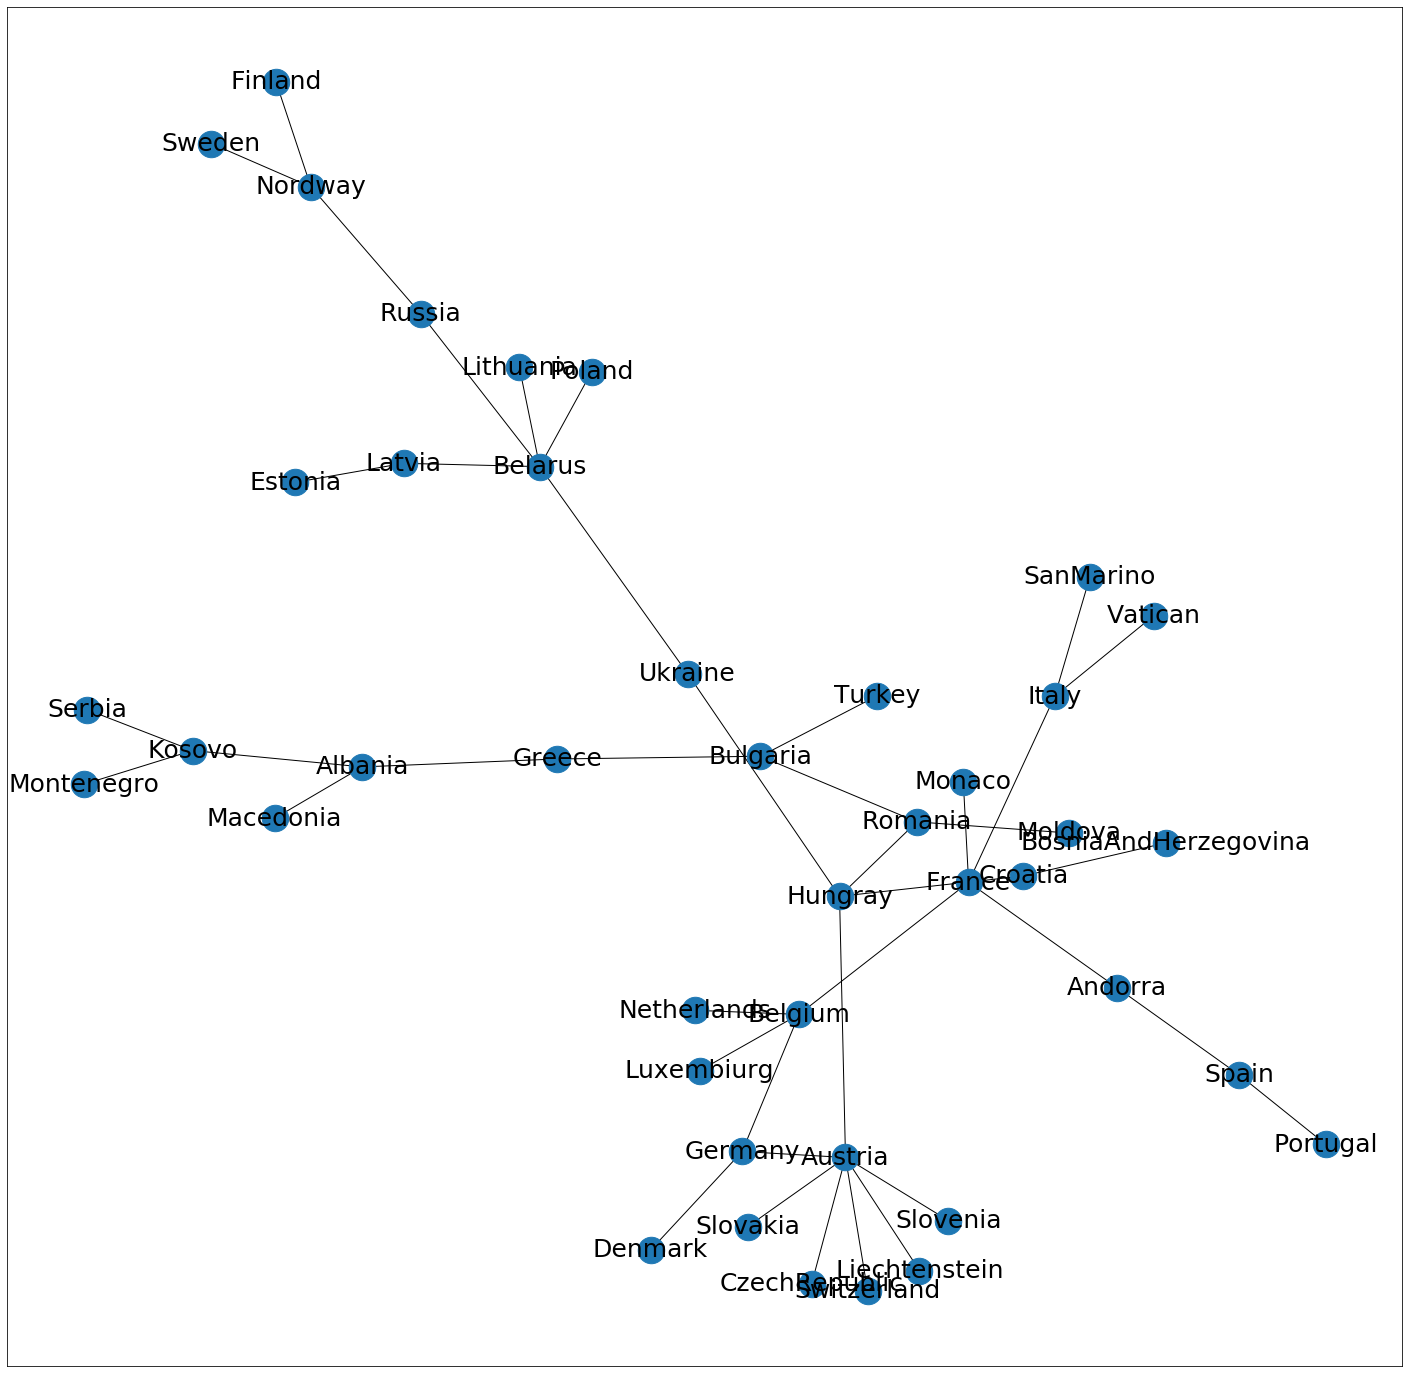

In [8]:
def prim_mst(n, m, edges):
    def find(v):
        nonlocal p
        while (v != p[v]):
            v = p[v]
        return v

    def check(v1, v2):
        return find(v1) == find(v2)

    def union():
        nonlocal p, rank, a, b, c, ans

        v1 = find(a)

        v2 = find(b)
        if rank[v1] > rank[v2]:
            v1, v2 = v2, v1
        rank[v2] += rank[v1]
        p[v1] = v2

    p = [i for i in range(n)]
    rank = [1] * n

    ans = 0
    ans_edges = []
    for i in range(m):
        a, b, c = edges[i]
        if not check(a, b):
            union()
            ans += c
            ans_edges.append([country[a], country[b]])

    G = nx.Graph()
    G.add_edges_from(ans_edges)

    plt.figure(figsize=(25, 25))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos=pos, font_size =25)
    nx.draw_networkx_nodes(G, pos, node_size=700)

    plt.show()


prim_mst(V, E, edges_name)